# COVID-19 Status (Colombia)

##### Limpieza y ajuste de datos (Desarrollador)*

In [1]:
# Libraries import
from datetime import datetime
from plotly.offline import init_notebook_mode, iplot
import requests
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from googletrans import Translator
import matplotlib.pyplot as plt
import statsmodels.api as sn

In [2]:
# Dataset import - 'Datos abiertos COVID-19 (Colombia)'
data = pd.DataFrame.from_dict(requests.get('https://www.datos.gov.co/resource/gt2j-8ykr.json?$limit=999999999').json())
#data

In [3]:
# Data cleaning and adjusting

# FE DE ERRATAS (2020-05-03): --------------------------------------------------------------------------------------------------------------------------------------------------
#data.loc[(data['Edad'].str.contains('-   -'))] = None
    
data = data[~data['edad'].str.contains('-   -')]
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#translator = Translator()

data.columns = ['Id de caso', 'Fecha de notificación', 'Código DIVIPOLA', 'Ciudad de ubicación', 'Departamento', 'Estado', 'Edad', 'Sexo', 'Tipo', 'Severidad','País de procedencia', 'Fecha de inicio de síntomas', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web', 'Tipo de recuperación', 'Código departamento', 'Código país', 'Pertenecia Étnica', 'Fecha de defunción', 'Nombre Grupo Étnico']

for column in ['Ciudad de ubicación', 'Estado', 'Sexo', 'Tipo', 'Severidad', 'País de procedencia']:
    data[column] = data[column].str.capitalize()
    
for column in ['Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de defunción', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web']:
       data[column] = data[column].str.slice(0,10).replace(r'(\d+)-(\d+)-(\d+)', r'\1-\2-\3', regex=True).apply(lambda x: pd.to_datetime(x, dayfirst=True, errors='ignore'))

data.loc[(data['Edad'].str.contains('[a-zA-Z]+', regex=True)), 'Edad'] = 0
data['Clasificación de edad'] = pd.cut(x=data['Edad'].apply(lambda x: float(x)), bins=[-np.inf,10,20,30,40,50,60,70,80,90,np.inf], include_lowest=True, labels=['0 - 10', '10 - 20', '20 - 30', '30 - 40', '40 - 50', '50 - 60', '60 - 70', '70 - 80', '80 - 90', '90 - 100+'])

#data['País de procedencia'] = data['País de procedencia'].apply(Translator().translate, src='es', dest='en').apply(getattr, args=('text',))

data = data[['Id de caso', 'Fecha de reporte web', 'Fecha de diagnóstico', 'Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de recuperación', 'Fecha de defunción', 'Ciudad de ubicación', 'Departamento', 'Severidad', 'Estado', 'Edad', 'Clasificación de edad', 'Sexo', 'Pertenecia Étnica', 'Nombre Grupo Étnico', 'Tipo', 'Tipo de recuperación', 'País de procedencia', 'Código departamento', 'Código país', 'Código DIVIPOLA']]
data = data.set_index('Id de caso')

date = datetime.today().strftime('%Y-%m-%d')
data.to_csv(f'./Datasets/COVID-19 Status (Colombia) [{date}].csv', index = True)

def numbers(div):
    for i in range(0, len(ax.patches)//div, 1):
        height = 0
        for j in range(0, div, 1):
            height += ax.patches[j*(len(ax.patches)//div)+i].get_height()
        ax.text(ax.patches[i].get_x()+(ax.patches[i].get_width()/10),height+(height/100)+10, int(height), fontsize=7, color='dimgrey', rotation=90)

def numbers_H(div):
    for i in range(0, len(ax.patches)//div, 1):
        width = 0
        for j in range(0, div, 1):
            width += ax.patches[j*(len(ax.patches)//div)+i].get_width()
        ax.text(width+(width/100)+10,ax.patches[i].get_y()+(ax.patches[i].get_height()/10), int(width), fontsize=7, color='dimgrey', rotation=0)

In [4]:
# Test

#data['País de procedencia'].unique().apply(lambda x: Translator().translate(x, src='es', dest='en').text)
#Translator().translate('España', src='es', dest='en').text

In [5]:
# In-line plots libraries import

%matplotlib inline
init_notebook_mode(connected = True)

## Análisis Dataset - COVID-19 (Colombia)

### - Datos Abiertos COVID-19 (Colombia)

In [6]:
data

Fecha de reporte web Fecha de diagnóstico Fecha de notificación  \
Id de caso                                                                   
1                    2020-03-06           2020-03-06            2020-03-02   
2                    2020-03-09           2020-03-09            2020-03-06   
3                    2020-03-09           2020-03-09            2020-03-07   
4                    2020-03-11           2020-03-11            2020-03-09   
5                    2020-03-11           2020-03-11            2020-03-09   
...                         ...                  ...                   ...   
327886               2020-08-03           2020-07-31            2020-07-20   
327887               2020-08-03           2020-07-28            2020-07-17   
327888               2020-08-03           2020-07-28            2020-07-17   
327889               2020-08-03           2020-07-28            2020-07-17   
327890               2020-08-03           2020-07-28            2020-07-17   

           Fecha de inicio de síntomas Fecha de recuperación  \
Id de caso                                                     
1                  2020-02-27 00:00:00            2020-03-13   
2                  2020-03-04 00:00:00            2020-03-19   
3                  2020-02-29 00:00:00            2020-03-15   
4                  2020-03-06 00:00:00            2020-03-26   
5                  2020-03-08 00:00:00            2020-03-23   
...                                ...                   ...   
327886             2020-07-15 00:00:00                   NaT   
327887             2020-07-14 00:00:00                   NaT   
327888             2020-07-14 00:00:00                   NaT   
327889             2020-07-14 00:00:00                   NaT   
327890             2020-07-14 00:00:00                   NaT   

           Fecha de defunción  Ciudad de ubicación     Departamento Severidad  \
Id de caso                                                                      
1                         NaT          Bogotá d.c.      Bogotá D.C.      Leve   
2                         NaT  Guadalajara de buga  Valle del Cauca      Leve   
3                         NaT             Medellín        Antioquia      Leve   
4                         NaT             Medellín        Antioquia      Leve   
5                         NaT             Medellín        Antioquia      Leve   
...                       ...                  ...              ...       ...   
327886                    NaT                Mocoa         Putumayo      Leve   
327887                    NaT            Sincelejo            Sucre      Leve   
327888                    NaT            Sincelejo            Sucre      Leve   
327889                    NaT            Sincelejo            Sucre      Leve   
327890                    NaT            Sincelejo            Sucre      Leve   

                Estado  ... Clasificación de edad Sexo Pertenecia Étnica  \
Id de caso              ...                                                
1           Recuperado  ...               10 - 20    F              Otro   
2           Recuperado  ...               30 - 40    M              Otro   
3           Recuperado  ...               40 - 50    F              Otro   
4           Recuperado  ...               50 - 60    M              Otro   
5           Recuperado  ...               20 - 30    M              Otro   
...                ...  ...                   ...  ...               ...   
327886            Casa  ...               10 - 20    M               NaN   
327887            Casa  ...               10 - 20    F               NaN   
327888            Casa  ...               10 - 20    M               NaN   
327889            Casa  ...               50 - 60    F               NaN   
327890            Casa  ...               20 - 30    F               NaN   

           Nombre Grupo Étnico         Tipo Tipo de recuperación  \
Id de caso                                          

### - Mapa de influencia - COVID-19 (Colombia) [Beta]

In [7]:
map_data = dict(
    type = 'choropleth',
    locations = data['País de procedencia'],
    locationmode = 'country names',
    colorscale = 'viridis',
    z = data['País de procedencia'].value_counts().tolist())

geo_map = go.Figure(data=[map_data])
iplot(geo_map)

### - Casos confirmados VS Departamento (Sexo)

In [8]:
data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0)

Sexo                                                    F      M
Departamento                                                    
Amazonas                                             1058   1455
Antioquia                                           18751  22176
Arauca                                                 55    191
Archipiélago de San Andrés Providencia y Santa ...     15     29
Atlántico                                           11127  12431
Barranquilla D.E.                                   14337  16539
Bogotá D.C.                                         54864  56430
Bolívar                                              1257   1591
Boyacá                                                586    626
Buenaventura D.E.                                     792   1340
Caldas                                                528    509
Caquetá                                               738    777
Cartagena D.T. y C.                                  7411   8950
Casanare                                              154    197
Cauca                                                 932   1199
Cesar                                                1544   1998
Chocó                                                1394   1675
Cundinamarca                                         4999   5033
Córdoba                                              3420   3521
Guainía                                                 6      8
Guaviare                                               14    101
Huila                                                 555    573
La Guajira                                           1118   1206
Magdalena                                            1140   1204
Meta                                                  840   2184
Nariño                                               3901   4530
Norte de Santander                                   1198   1621
Putumayo                                              509    619
Quindío                                               207    195
Risaralda                                            1047   1010
Santa Marta D.T. y C.                                2261   2458
Santander                                            1857   2577
Sucre                                                2916   3410
Tolima                                               1013   1887
Valle del Cauca                                     11780  13208
Vaupés                                                 27     34
Vichada                                                 2      5

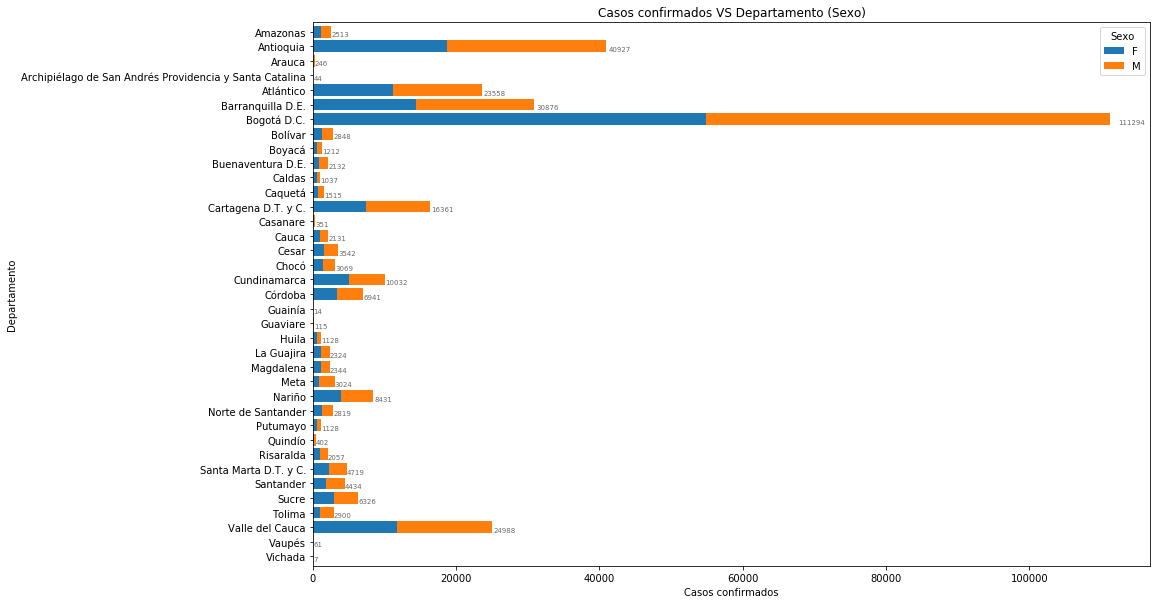

In [9]:
ax = data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Clasificación de edad)

In [10]:
data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad                               0 - 10  10 - 20  20 - 30  \
Departamento                                                                   
Amazonas                                               133      452      510   
Antioquia                                             1394     2885    10795   
Arauca                                                   9       52       90   
Archipiélago de San Andrés Providencia y Santa ...       0        1       14   
Atlántico                                             1067     1856     5053   
Barranquilla D.E.                                     1186     2017     6718   
Bogotá D.C.                                           4850     8420    25519   
Bolívar                                                138      272      654   
Boyacá                                                  66      124      256   
Buenaventura D.E.                                       46      281      489   
Caldas                                                  39       70      230   
Caquetá                                                 46       88      429   
Cartagena D.T. y C.                                    753     1217     3736   
Casanare                                                17       17      100   
Cauca                                                   98      178      503   
Cesar                                                  225      313      831   
Chocó                                                  131      267      727   
Cundinamarca                                           479      756     2333   
Córdoba                                                212      392     1421   
Guainía                                                  0        2        4   
Guaviare                                                 1       33       26   
Huila                                                   62      109      247   
La Guajira                                             124      228      482   
Magdalena                                              126      168      435   
Meta                                                    62      251      940   
Nariño                                                 379      707     1962   
Norte de Santander                                      87      133      658   
Putumayo                                                33       87      334   
Quindío                                                 13       22       86   
Risaralda                                              115      186      469   
Santa Marta D.T. y C.                                  198      318     1048   
Santander                                              168      297     1009   
Sucre                                                  253      503     1319   
Tolima                                                 128      178      827   
Valle del Cauca                                        833     1653     5704   
Vaupés                                                   4        5       19   
Vichada                                                  0        5        1   

Clasificación de edad                               30 - 40  40 - 50  50 - 60  \
Departamento                                                                    
Amazonas                                                481      342      276   
Antioquia                                             10270     6349     4832   
Arauca                                                   59       20        8   
Archipiélago de San Andrés Providencia y Santa ...       12       10        4   
Atlántico                                              5435     3746     3077   
Barranquilla D.E.                                      7312     4838     4157   
Bogotá D.C.                                           24677    18022    15075   
Bolívar                                                 667      398      255   
Boyacá                                                  230      195 

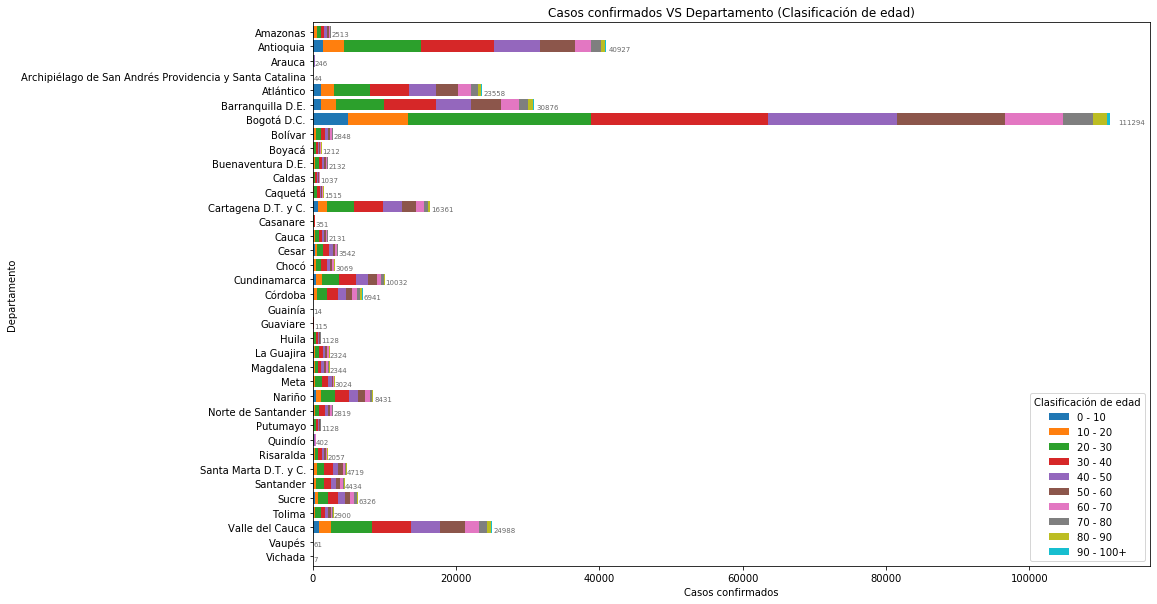

In [11]:
ax = data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Estado)

In [12]:
data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0)

Estado                                                 Casa  Fallecido  \
Departamento                                                             
Amazonas                                               47.0      104.0   
Antioquia                                           25454.0      625.0   
Arauca                                                 81.0        4.0   
Archipiélago de San Andrés Providencia y Santa ...     11.0        0.0   
Atlántico                                            4604.0     1090.0   
Barranquilla D.E.                                    5146.0     1496.0   
Bogotá D.C.                                         48704.0     3052.0   
Bolívar                                              1084.0      127.0   
Boyacá                                                562.0       32.0   
Buenaventura D.E.                                     210.0      145.0   
Caldas                                                650.0       14.0   
Caquetá                                              1104.0       33.0   
Cartagena D.T. y C.                                  2931.0      476.0   
Casanare                                              171.0        6.0   
Cauca                                                 914.0       69.0   
Cesar                                                1479.0       73.0   
Chocó                                                 513.0      105.0   
Cundinamarca                                         4047.0      267.0   
Córdoba                                              3326.0      727.0   
Guainía                                                 0.0        1.0   
Guaviare                                               58.0        0.0   
Huila                                                 557.0       27.0   
La Guajira                                            802.0      131.0   
Magdalena                                             561.0      217.0   
Meta                                                 1022.0       42.0   
Nariño                                               2653.0      274.0   
Norte de Santander                                   1611.0      139.0   
Putumayo                                              741.0       47.0   
Quindío                                               167.0        8.0   
Risaralda                                            1098.0       34.0   
Santa Marta D.T. y C.                                1889.0      159.0   
Santander                                            2287.0      137.0   
Sucre                                                2004.0      381.0   
Tolima                                               1076.0       61.0   
Valle del Cauca                                      8531.0      913.0   
Vaupés                                                  1.0        1.0   
Vichada                                                 5.0        0.0   

Estado                                              Hospital  Hospital uci  \
Departamento                                                                 
Amazonas                                                 6.0           4.0   
Antioquia                                             1482.0         166.0   
Arauca                                                   6.0           3.0   
Archipiélago de San Andrés Providencia y Santa ...       1.0           1.0   
Atlántico                                              502.0          76.0   
Barranquilla D.E.                                      744.0          81.0   
Bogotá D.C.                                           5642.0         324.0   
Bolívar                                                109.0          10.0   
Boyacá                                                  65.0           7.0   
Buenaventura D.E.                                      105.0          25.0   
Caldas                                                  36.0          10.0   
Caquetá                                                116.0           5.0   
Cartagena D.T. y C.  

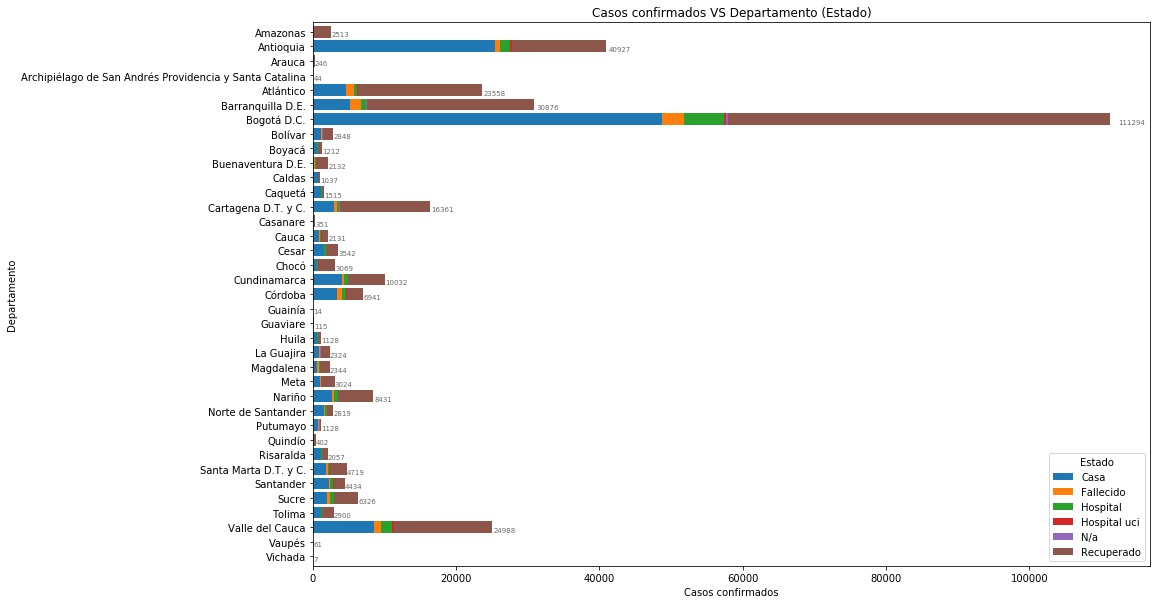

In [13]:
ax = data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Sexo)

In [14]:
data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0)

Sexo              F      M
Estado                    
Casa          61390  64711
Fallecido      4000   7017
Hospital       6303   8485
Hospital uci    530   1011
N/a             287    389
Recuperado    81843  91884

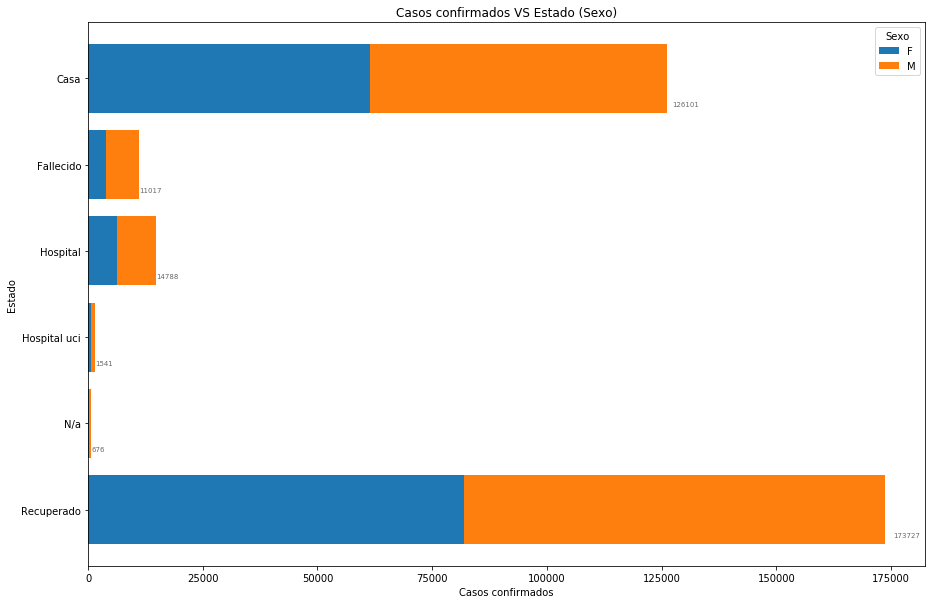

In [15]:
ax = data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Clasificación de edad)

In [16]:
data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Estado                                                                       
Casa                     5072     9832    31323    31133    20585    15542   
Fallecido                  24       19      157      378      859     1675   
Hospital                  588      297     1090     1724     2203     3052   
Hospital uci               72       27       61      160      233      366   
N/a                        19       15       31       28       51       83   
Recuperado               7700    14353    43316    42513    27741    21154   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Estado                                                       
Casa                      7509     3459     1396        250  
Fallecido                 2625     2759     2051        470  
Hospital                  2898     1908      908        120  
Hospital uci               349      212       55          6  
N/a                        133      149      129         38  
Recuperado               10374     4516     1777        283

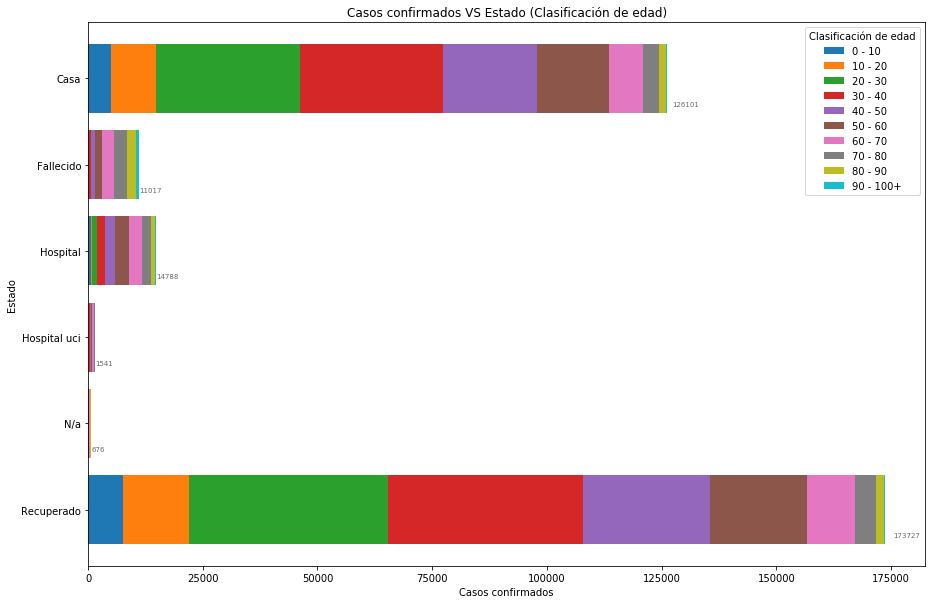

In [17]:
ax = data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo de contagio (Sexo)

In [18]:
data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0)

Sexo              F       M
Tipo                       
En estudio   147544  158259
Importado       456     520
Relacionado    6353   14718

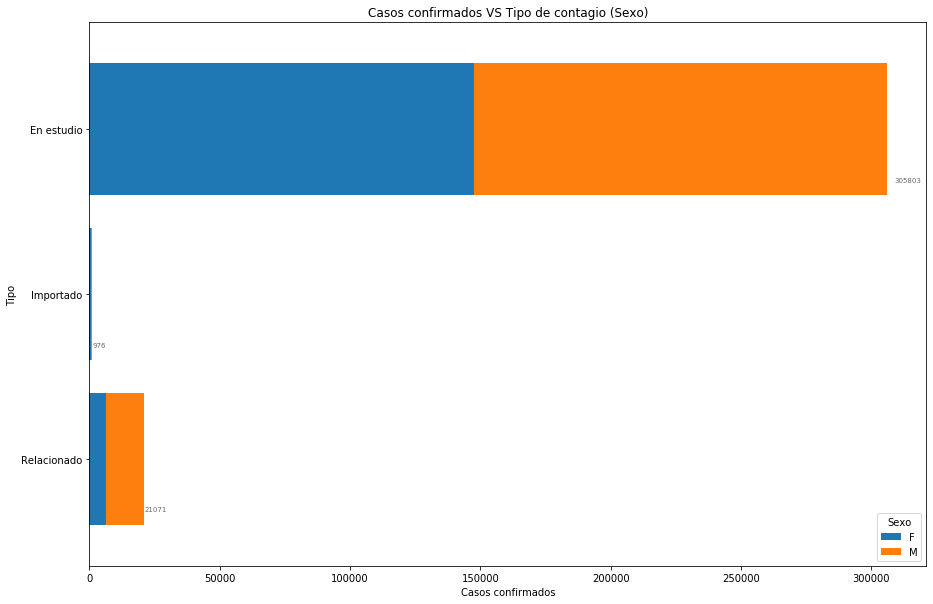

In [19]:
ax = data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo de contagio (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo (Clasificación de edad)

In [20]:
data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Tipo                                                                         
En estudio              12555    22016    69929    70588    48661    39702   
Importado                   6       37      241      230      173      150   
Relacionado               914     2490     5808     5118     2838     2020   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Tipo                                                         
En estudio               22758    12478     6017       1099  
Importado                   94       35        9          1  
Relacionado               1036      490      290         67

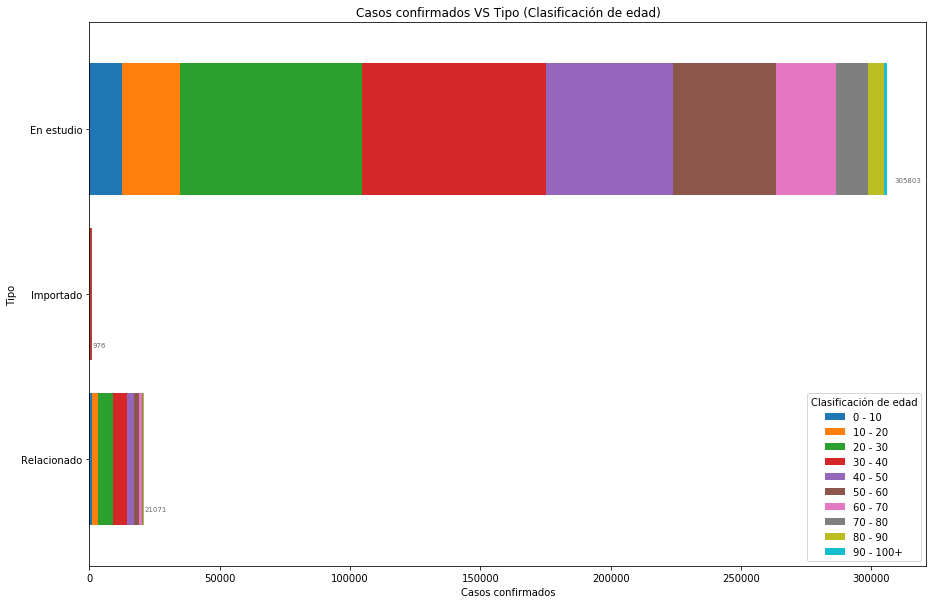

In [21]:
ax = data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Sexo)

In [22]:
data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0)

Sexo                       F      M
Clasificación de edad              
0 - 10                  6596   6879
10 - 20                11395  13148
20 - 30                36560  39418
30 - 40                35134  40802
40 - 50                24373  27299
50 - 60                19614  22258
60 - 70                11006  12882
70 - 80                 5888   7115
80 - 90                 3116   3200
90 - 100+                671    496

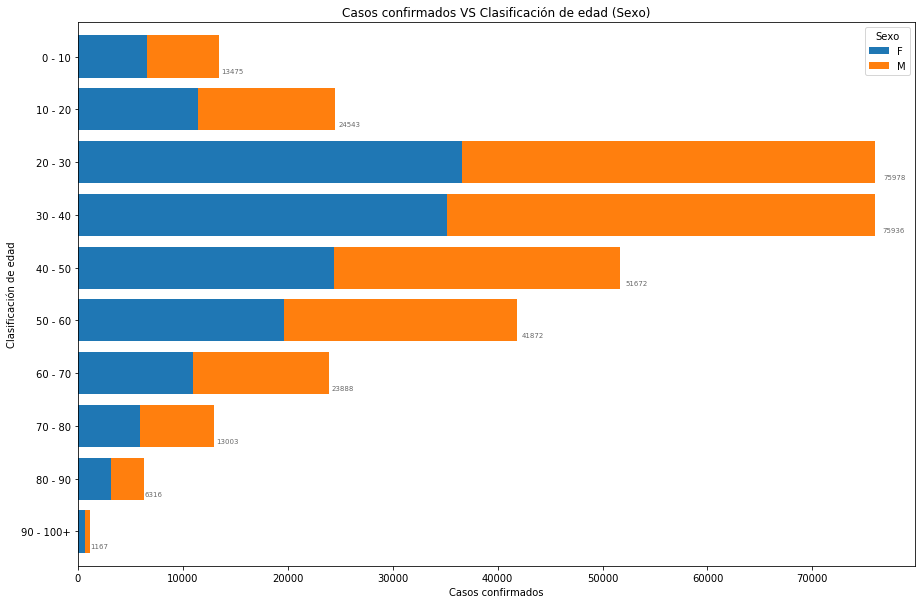

In [23]:
ax = data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Estado)

In [24]:
data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0)

Estado                  Casa  Fallecido  Hospital  Hospital uci  N/a  \
Clasificación de edad                                                  
0 - 10                  5072         24       588            72   19   
10 - 20                 9832         19       297            27   15   
20 - 30                31323        157      1090            61   31   
30 - 40                31133        378      1724           160   28   
40 - 50                20585        859      2203           233   51   
50 - 60                15542       1675      3052           366   83   
60 - 70                 7509       2625      2898           349  133   
70 - 80                 3459       2759      1908           212  149   
80 - 90                 1396       2051       908            55  129   
90 - 100+                250        470       120             6   38   

Estado                 Recuperado  
Clasificación de edad              
0 - 10                       7700  
10 - 20                     14353  
20 - 30                     43316  
30 - 40                     42513  
40 - 50                     27741  
50 - 60                     21154  
60 - 70                     10374  
70 - 80                      4516  
80 - 90                      1777  
90 - 100+                     283

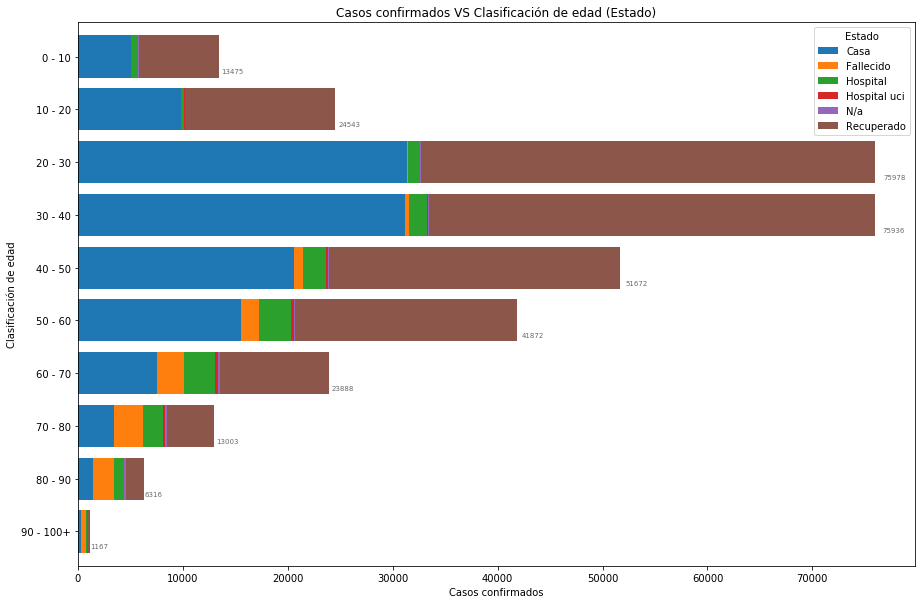

In [25]:
ax = data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Fecha de diagnóstico (Sexo)

In [26]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0)

Sexo                       F       M
Fecha de diagnóstico                
2020-03-06               1.0     0.0
2020-03-09               1.0     1.0
2020-03-11               4.0     2.0
2020-03-12               5.0     0.0
2020-03-13               2.0     3.0
...                      ...     ...
2020-07-30            4131.0  4342.0
2020-07-31            2985.0  2960.0
2020-08-01            4298.0  4462.0
2020-08-02            4169.0  3953.0
2020-08-03             158.0   174.0

[148 rows x 2 columns]

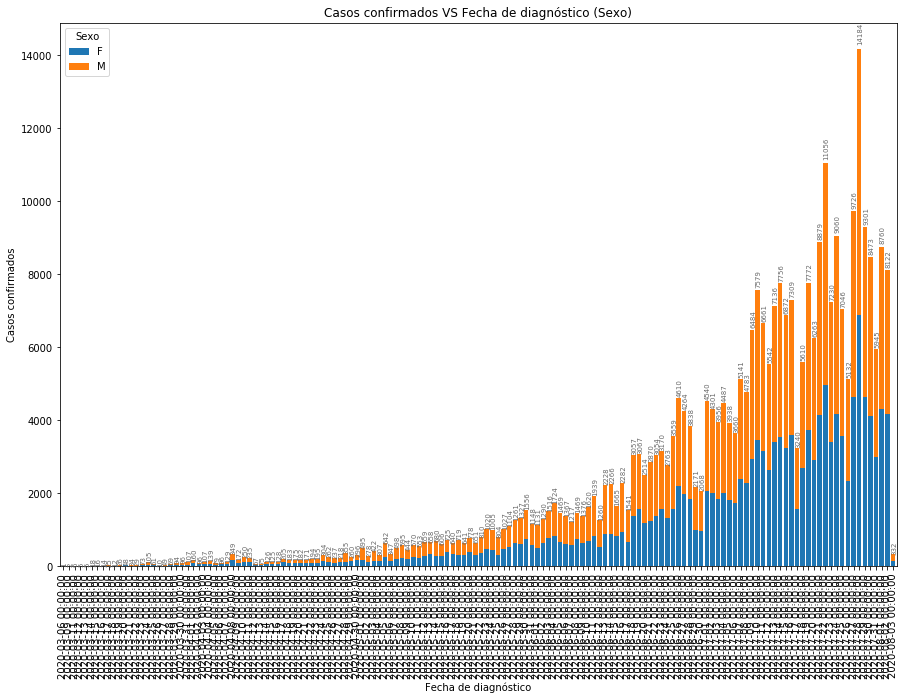

In [27]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)

In [28]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Fecha de diagnóstico                                                         
2020-03-06                  0        1        0        0        0        0   
2020-03-09                  0        0        0        1        1        0   
2020-03-11                  0        0        4        0        0        1   
2020-03-12                  0        0        0        1        1        1   
2020-03-13                  0        0        1        0        2        0   
...                       ...      ...      ...      ...      ...      ...   
2020-07-30                331      679     2068     2020     1244     1091   
2020-07-31                224      389     1340     1404     1029      723   
2020-08-01                325      654     2134     2105     1350     1101   
2020-08-02                329      541     1834     1839     1372     1156   
2020-08-03                  6       16       61       89       56       44   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Fecha de diagnóstico                                         
2020-03-06                   0        0        0          0  
2020-03-09                   0        0        0          0  
2020-03-11                   0        0        1          0  
2020-03-12                   1        1        0          0  
2020-03-13                   2        0        0          0  
...                        ...      ...      ...        ...  
2020-07-30                 543      321      147         29  
2020-07-31                 429      273      117         17  
2020-08-01                 582      330      152         27  
2020-08-02                 565      309      149         28  
2020-08-03                  34       13       11          2  

[148 rows x 10 columns]

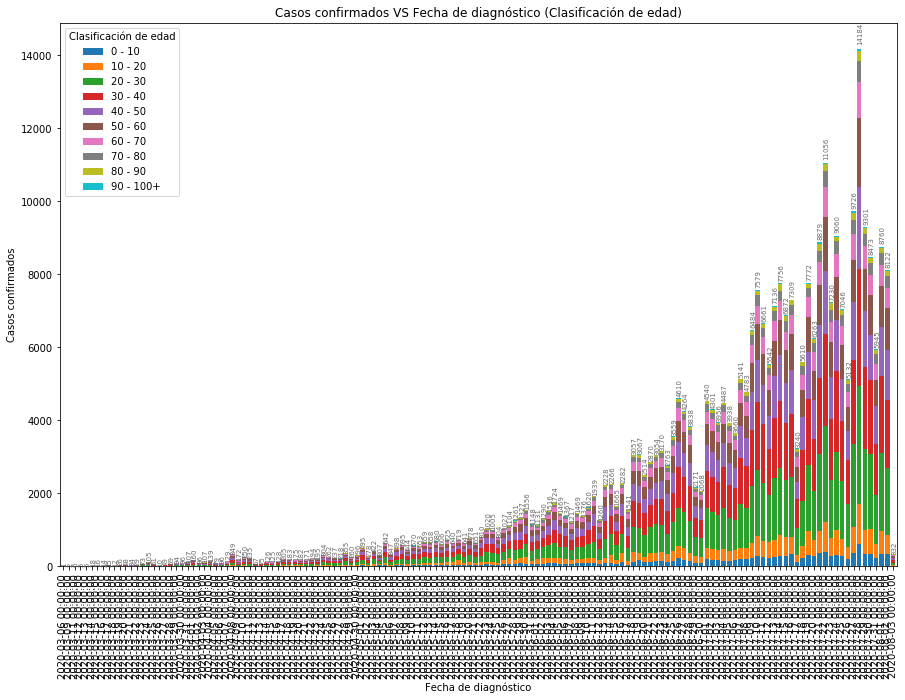

In [29]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Estado)

In [30]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0)

Estado                  Casa  Fallecido  Hospital  Hospital uci  N/a  \
Fecha de diagnóstico                                                   
2020-03-06               0.0        0.0       0.0           0.0  0.0   
2020-03-09               0.0        0.0       0.0           0.0  0.0   
2020-03-11               0.0        0.0       0.0           0.0  0.0   
2020-03-12               0.0        0.0       0.0           0.0  0.0   
2020-03-13               0.0        0.0       0.0           0.0  0.0   
...                      ...        ...       ...           ...  ...   
2020-07-30            7845.0      123.0     401.0          28.0  6.0   
2020-07-31            5522.0       78.0     315.0          24.0  4.0   
2020-08-01            8010.0      122.0     574.0          25.0  3.0   
2020-08-02            7490.0       68.0     545.0          13.0  4.0   
2020-08-03             292.0        0.0      38.0           2.0  0.0   

Estado                Recuperado  
Fecha de diagnóstico              
2020-03-06                   1.0  
2020-03-09                   2.0  
2020-03-11                   6.0  
2020-03-12                   5.0  
2020-03-13                   5.0  
...                          ...  
2020-07-30                  70.0  
2020-07-31                   2.0  
2020-08-01                  26.0  
2020-08-02                   2.0  
2020-08-03                   0.0  

[148 rows x 6 columns]

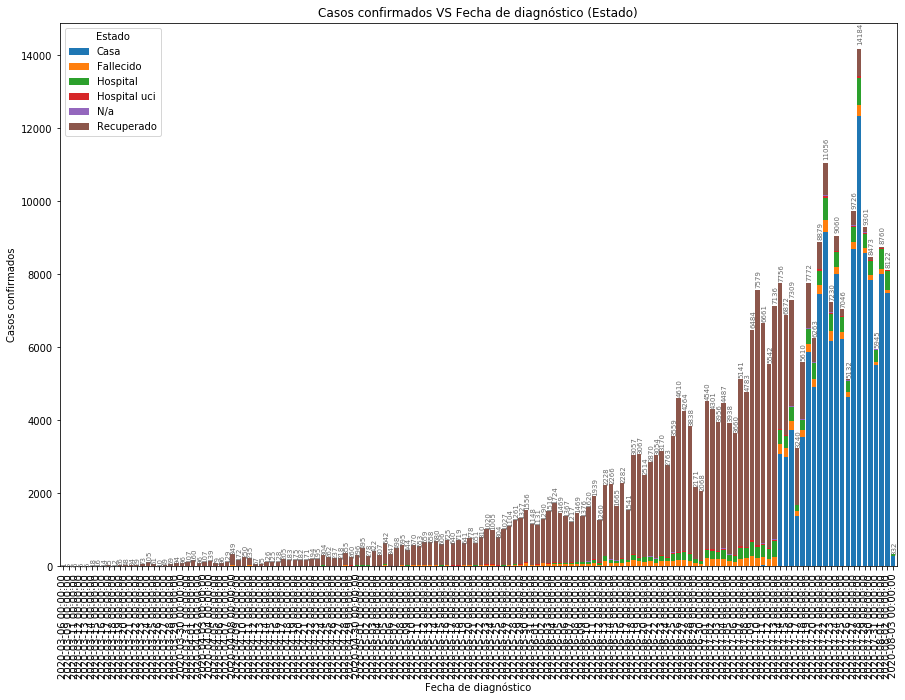

In [31]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)

In [32]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum()

Sexo                         F         M
Fecha de diagnóstico                    
2020-03-06                 1.0       0.0
2020-03-09                 2.0       1.0
2020-03-11                 6.0       3.0
2020-03-12                11.0       3.0
2020-03-13                13.0       6.0
...                        ...       ...
2020-07-30            140960.0  159967.0
2020-07-31            143945.0  162927.0
2020-08-01            148243.0  167389.0
2020-08-02            152412.0  171342.0
2020-08-03            152570.0  171516.0

[148 rows x 2 columns]

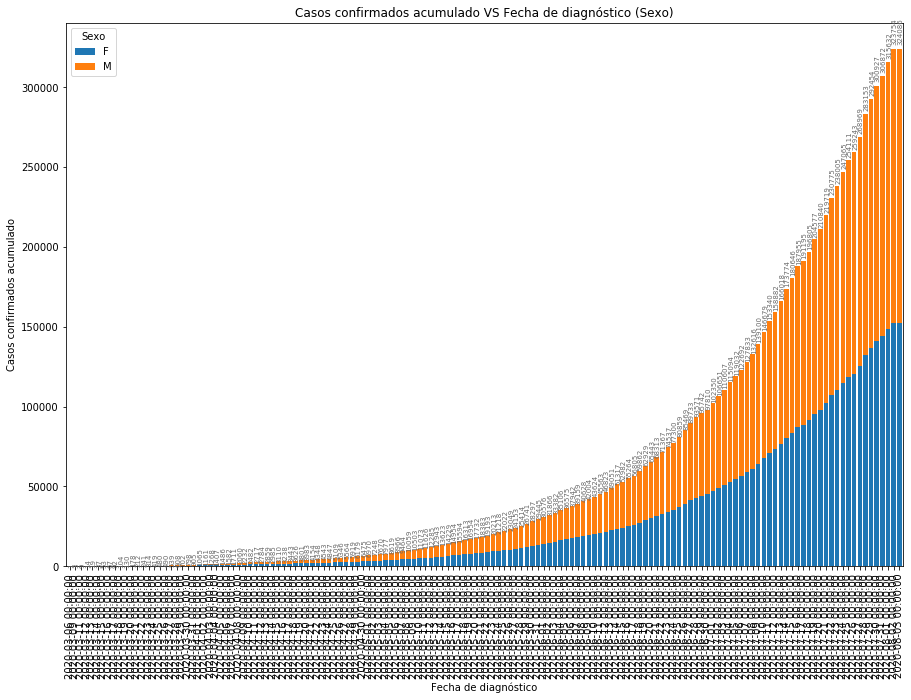

In [33]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Clasificación de edad)

In [34]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum()

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Fecha de diagnóstico                                                         
2020-03-06                  0        1        0        0        0        0   
2020-03-09                  0        1        0        1        1        0   
2020-03-11                  0        1        4        1        1        1   
2020-03-12                  0        1        4        2        2        2   
2020-03-13                  0        1        5        2        4        2   
...                       ...      ...      ...      ...      ...      ...   
2020-07-30              12458    22674    69719    69593    47311    38384   
2020-07-31              12682    23063    71059    70997    48340    39107   
2020-08-01              13007    23717    73193    73102    49690    40208   
2020-08-02              13336    24258    75027    74941    51062    41364   
2020-08-03              13342    24274    75088    75030    51118    41408   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Fecha de diagnóstico                                         
2020-03-06                   0        0        0          0  
2020-03-09                   0        0        0          0  
2020-03-11                   0        0        1          0  
2020-03-12                   1        1        1          0  
2020-03-13                   3        1        1          0  
...                        ...      ...      ...        ...  
2020-07-30               21984    11919     5802       1083  
2020-07-31               22413    12192     5919       1100  
2020-08-01               22995    12522     6071       1127  
2020-08-02               23560    12831     6220       1155  
2020-08-03               23594    12844     6231       1157  

[148 rows x 10 columns]

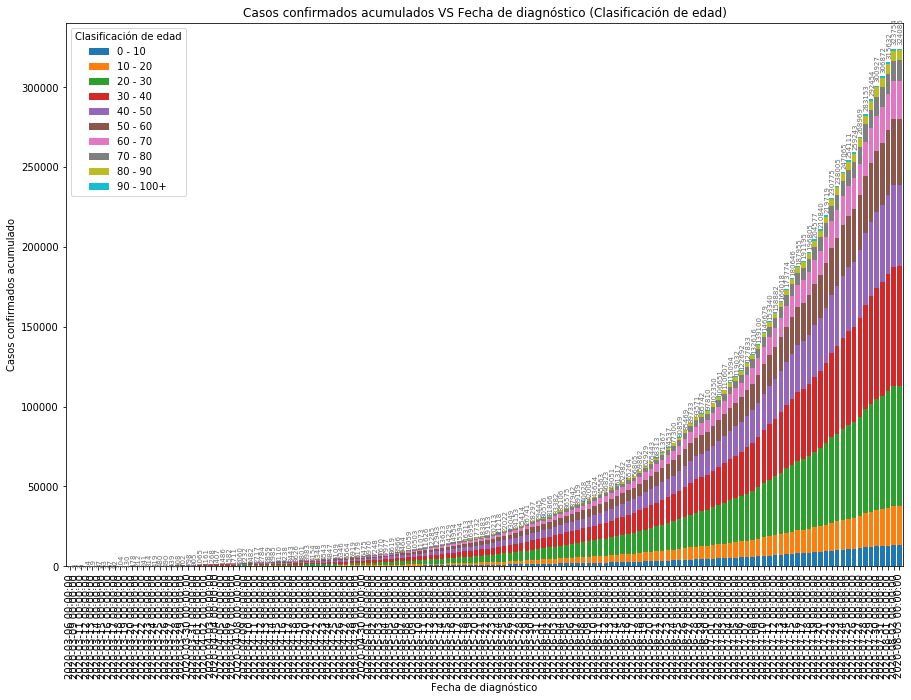

In [35]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Estado)

In [36]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum()

Estado                    Casa  Fallecido  Hospital  Hospital uci    N/a  \
Fecha de diagnóstico                                                       
2020-03-06                 0.0        0.0       0.0           0.0    0.0   
2020-03-09                 0.0        0.0       0.0           0.0    0.0   
2020-03-11                 0.0        0.0       0.0           0.0    0.0   
2020-03-12                 0.0        0.0       0.0           0.0    0.0   
2020-03-13                 0.0        0.0       0.0           0.0    0.0   
...                        ...        ...       ...           ...    ...   
2020-07-30            104748.0    10558.0   13185.0        1449.0  644.0   
2020-07-31            110270.0    10636.0   13500.0        1473.0  648.0   
2020-08-01            118280.0    10758.0   14074.0        1498.0  651.0   
2020-08-02            125770.0    10826.0   14619.0        1511.0  655.0   
2020-08-03            126062.0    10826.0   14657.0        1513.0  655.0   

Estado                Recuperado  
Fecha de diagnóstico              
2020-03-06                   1.0  
2020-03-09                   3.0  
2020-03-11                   9.0  
2020-03-12                  14.0  
2020-03-13                  19.0  
...                          ...  
2020-07-30              170343.0  
2020-07-31              170345.0  
2020-08-01              170371.0  
2020-08-02              170373.0  
2020-08-03              170373.0  

[148 rows x 6 columns]

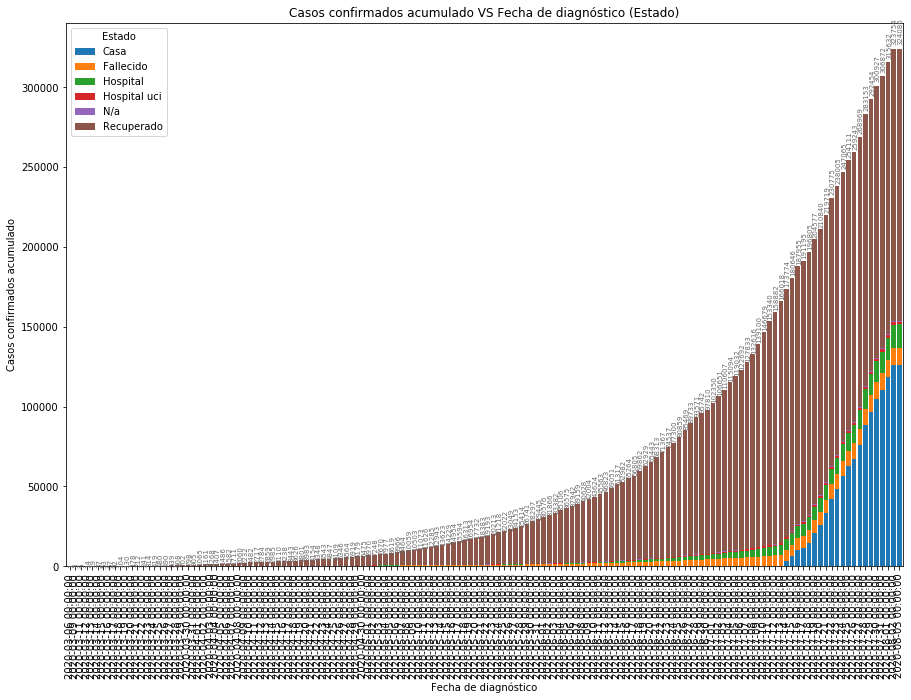

In [37]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Estado'].unique())
numbers(div)

## #StayHome #QuédateEnCasa

### Made with ♥ by <a href='https://github.com/jlcadavid'>@jlcadavid</a>